In [1]:
import pandas as pd
from sklearn import preprocessing as prep
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
test = pd.read_csv(r'C:\Users\lopes\Desktop\Dataset\test.csv')
train = pd.read_csv(r'C:\Users\lopes\Desktop\Dataset\train.csv')
test.head()
#test.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Visualize the shape of data, the type of data , the missing values , unique counts , and build a data dictionary dataframe.   

In [2]:
train.shape

(891, 12)

In [3]:
# Creating the Data Dictionary with first column being datatype.
Data = pd.DataFrame(train.dtypes)
Data

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [4]:
# identifying the missing values from the dataset.

Data['MissingVal'] = train.isnull().sum()
Data

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [5]:
# Identifying unique values . For this I've used nunique() which returns unique elements in the object.

Data['UniqueVal'] = train.nunique()
Data

,0,MissingVal,UniqueVal
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [6]:
# identifying count of the variable.

Data['Count'] = train.count()
Data

,0,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [7]:
# renaming the first column using rename()

Data = Data.rename(columns = {0:'DataType'})
Data

,DataType,MissingVal,UniqueVal,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


## Run discriptive statistics on objects and other  numerical datatypes.

In [8]:
# get discriptive statistics on "number" datatypes
train.describe(include = ['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Applying Univariate and Multivariate Data Analysis using graphical representations

### Univariate Data Analysis

C:\Users\lopes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lopes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lopes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\lopes\anaconda3\lib\si

<AxesSubplot:xlabel='Age', ylabel='Density'>

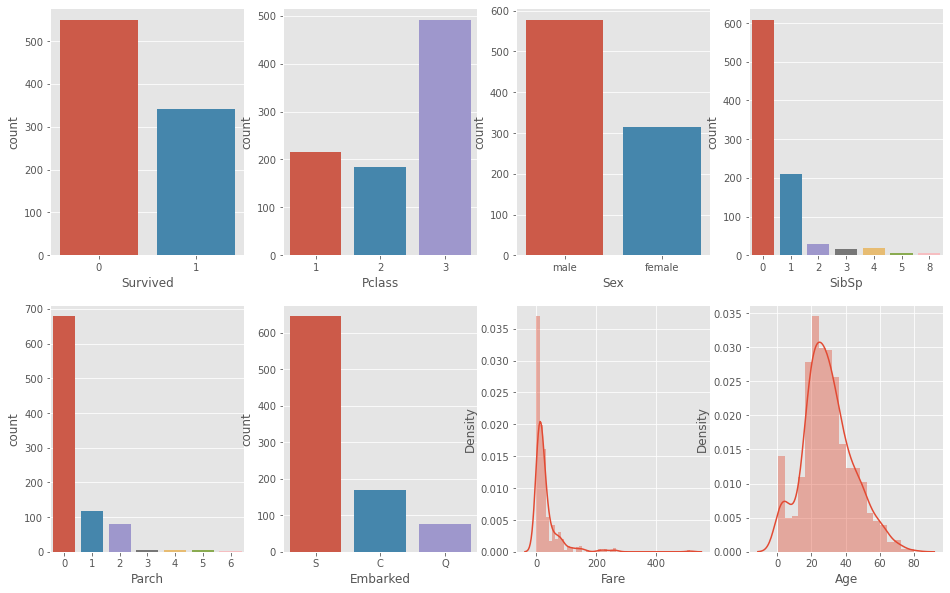

In [9]:
#We have used count plot for all the column accept for Fare and Age.Since the data is varied and representing does not generate an analysis 

fig , axes = plt.subplots(2, 4, figsize = (16,10) )
sns.countplot('Survived' , data = train, ax = axes[0,0])
sns.countplot('Pclass' , data = train, ax = axes[0,1])
sns.countplot('Sex' , data = train, ax = axes[0,2])
sns.countplot('SibSp' , data = train, ax = axes[0,3])
sns.countplot('Parch' , data = train, ax = axes[1,0])
sns.countplot('Embarked' , data = train, ax = axes[1,1])
sns.distplot(train['Fare'] , kde = True , ax = axes[1,2])
sns.distplot(train['Age'].dropna() , kde = True , ax = axes[1,3])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

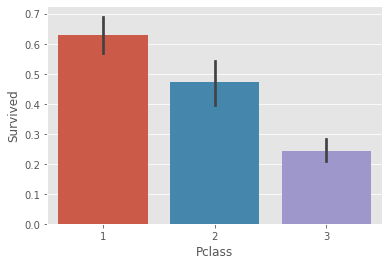

In [10]:
#Survival Passanger class and percentage
sns.barplot(x='Pclass', y='Survived', data=train)


C:\Users\lopes\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


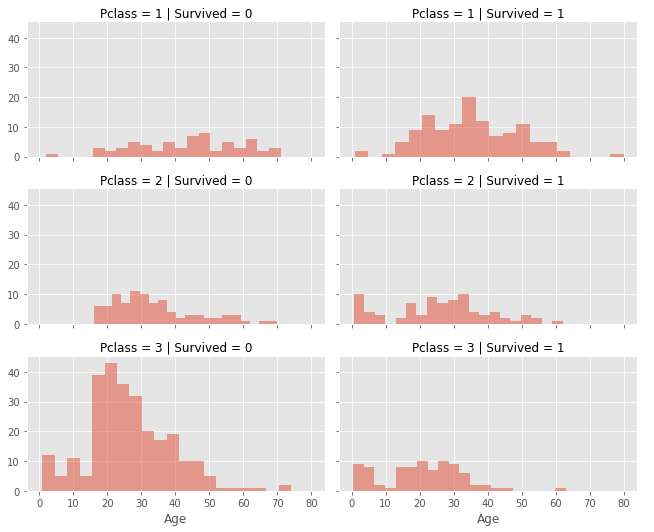

In [11]:
#Detailedccalculation survival per class per age group
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.5, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Multivariate Data Analysis

### There is a positive correlation between Fare and Survived and negative correlation between Pclass and Survived, Fare and Pclass , Age and Pclass.

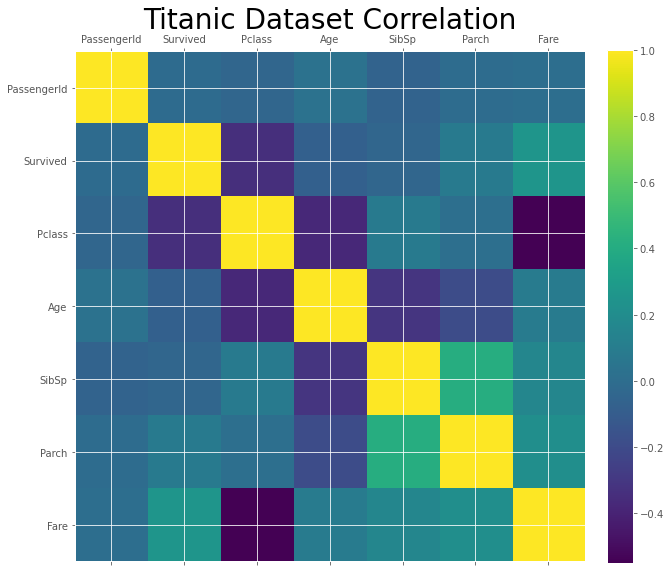

In [12]:
# For multivariate data analysis I've used pandas "correlation matrix" . You can also use seaborn "heatmap".
def plotting_corr( train , size = 10):
    corr = train.corr()
    fig , ax = plt.subplots(figsize = (size,size))
    cax = ax.matshow(corr)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    plt.title('Titanic Dataset Correlation' , fontsize=28)
    plt.xticks(range(len(corr.columns)) , corr.columns);
    plt.yticks(range(len(corr.columns)) , corr.columns);

plotting_corr(train , size = 10)


In [ ]:
#Thank you!!